In [3]:
import pandas as pd
import numpy as np

# Reading csv file
hitters = pd.read_csv("Hitters.csv")
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# Removing observations with missing values
hitters = hitters.dropna()

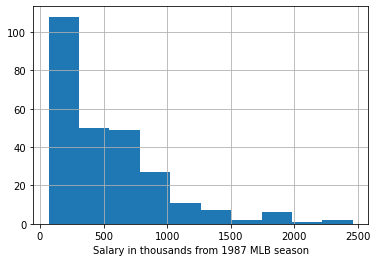

In [6]:
import matplotlib.pyplot as plt

# Creating histogram of salary
plt.hist('Salary', data = hitters)
plt.xlabel("Salary in thousands from 1987 MLB season")
plt.grid()
plt.show()

#### I would say the salary data for this season is right-skewed.

In [16]:
# Computing the log(salary)
hitters['log_salary'] = np.log(hitters['Salary'])

## Building the linear model
import statsmodels.formula.api as smf
log_md = smf.ols(formula = 'log_salary ~ AtBat + Hits + HmRun', data = hitters).fit()

## Extracting the model results
log_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     25.10
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           2.73e-14
Time:                        20:55:08   Log-Likelihood:                -308.23
No. Observations:                 263   AIC:                             624.5
Df Residuals:                     259   BIC:                             638.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1036      0.150     34.111      0.000       4.809       5.398
AtBat         -0.0022      0.001     -1.722      0.086      -0.005       0.000
Hits           0.0140      0.004      3.458      0.001       0.006       0.022
HmRun          0.0165      0.007      2.477      0.014       0.003       0.030
==============================================================================
Omnibus:                        3.365   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.140
Skew:                          -0.202   Prob(JB):                        0.208
Kurtosis:                       2.649   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Defining the new observation
newdata = pd.DataFrame({'AtBat': [600], 'Hits': [220], 'HmRun': [35]})

## Estimating salary
pred = np.exp(log_md.predict(newdata))
print(round(pred*1000, 2))

0    1733382.65
dtype: float64


#### The estimated salary for a MLB 1986/87 season with AtBat = 600, Hits = 220, and HmRun = 35 is 1,733,382.65 dollars.